In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,7)

xls = pd.ExcelFile('HW-4.xlsx')
df = pd.read_excel(xls, 'Solenoid Valve Data')
observed = df['Solenoid Valve Time of Failure']

# Problem 1
### 1.1 Fit Weibull

FITTED PARAMS:
c:  7.001677791180635
loc:  2.140727702438724
scale:  7.7916435400698845


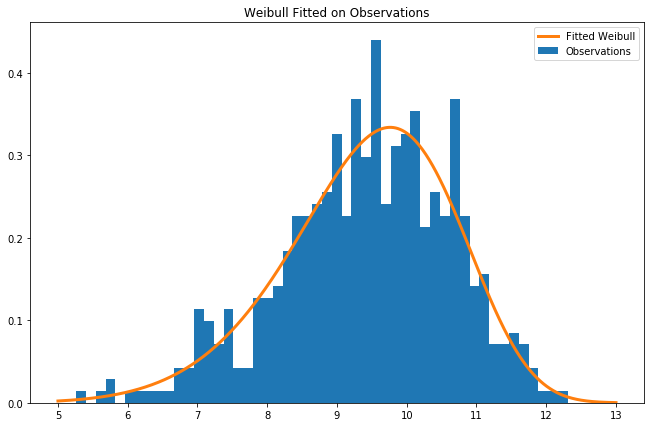

In [4]:
from scipy.stats import weibull_min

params = st.weibull_min.fit(df)
weibull_c = params[0]
weibull_loc = params[1]
weibull_scale = params[2]
print('FITTED PARAMS:')
print('c: ', weibull_c)
print('loc: ', weibull_loc)
print('scale: ', weibull_scale)

x = np.linspace(5,13,500)

plt.hist(observed, density=True, bins=50);
plt.plot(x, weibull_min.pdf(x, *params), linewidth=3)
plt.legend(['Fitted Weibull', 'Observations'])
plt.title('Weibull Fitted on Observations');

### 1.2 Fit Exponential

FITTED PARAMS:
loc:  5.258817325502657
scale:  4.169345396929066


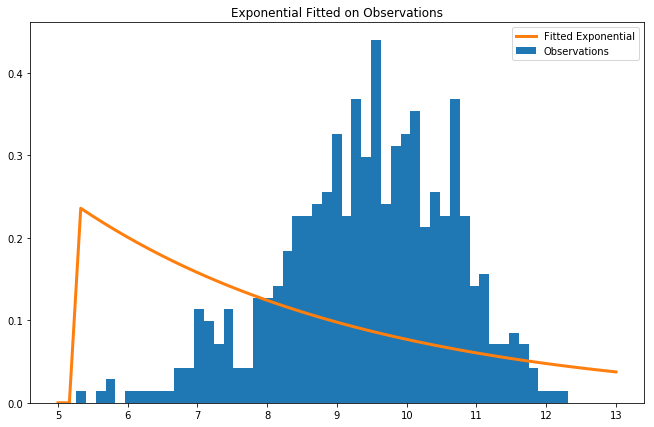

In [5]:
from scipy.stats import expon

#MLE
params = st.expon.fit(df)
expon_loc = params[0]
expon_scale = params[1]
print('FITTED PARAMS:')
print('loc: ', expon_loc) # this is the mean
print('scale: ', expon_scale) # this is the standard deviation

x = np.linspace(5,13,50)

plt.hist(observed, bins=50, density=True);
plt.plot(x, st.expon.pdf(x, expon_loc, expon_scale), linewidth=3);
plt.legend(['Fitted Exponential', 'Observations'])
plt.title('Exponential Fitted on Observations');

### 1.3 Fit Lognormal

FITTED PARAMS:
sigma:  0.0038339488066541673
loc:  -309.7979211793222
scale:  319.22452277157777


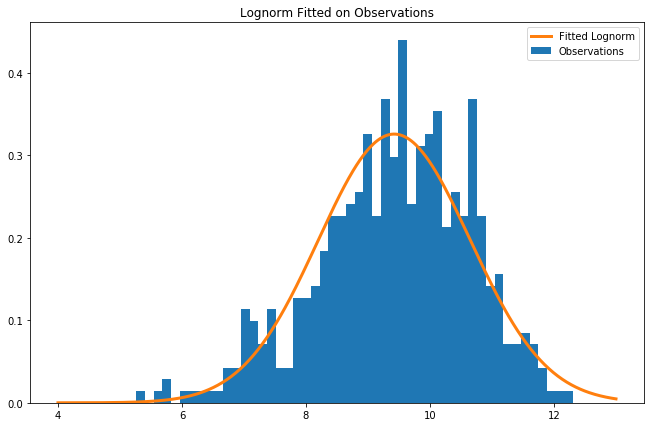

In [8]:
from scipy.stats import lognorm

#MLE
lognorm_shape, lognorm_loc, lognorm_scale = st.lognorm.fit(df['Solenoid Valve Time of Failure'])

print('FITTED PARAMS:')
print('sigma: ', lognorm_shape)
print('loc: ', lognorm_loc)
print('scale: ', lognorm_scale)

x = np.linspace(4,13,500)
pdf = st.lognorm.pdf(x, lognorm_shape, lognorm_loc, lognorm_scale)

plt.hist(observed, bins=50, density=True);
plt.plot(x, pdf, linewidth=3);
plt.legend(['Fitted Lognorm', 'Observations'])
plt.title('Lognorm Fitted on Observations');

## Problem 2
#### Chi Square Tests

In [9]:
from scipy.stats import chisquare

hist, bin_edges = np.histogram(observed, bins='auto')
observed_values = hist


weibull_cdf = weibull_min.cdf(bin_edges, weibull_c, weibull_loc, weibull_scale)
expected_values = len(observed)*np.diff(weibull_cdf)
print("Chi-Square of Weibull:", chisquare(observed_values, expected_values)[0], 
      "; p-value =", chisquare(observed_values, expected_values)[1])

expon_cdf = expon.cdf(bin_edges, expon_loc, expon_scale)
expected_values = len(observed)*np.diff(expon_cdf)
print("Chi-Square of Exponential:", chisquare(observed_values, expected_values)[0], 
      "; p-value =", chisquare(observed_values, expected_values)[1])

lognorm_cdf = lognorm.cdf(bin_edges, lognorm_shape, lognorm_loc, lognorm_scale)
expected_values = len(observed)*np.diff(lognorm_cdf)
print("Chi-Square of Lognormal:", chisquare(observed_values, expected_values)[0], 
      "; p-value =", chisquare(observed_values, expected_values)[1])

Chi-Square of Weibull: 7.785117440257858 ; p-value = 0.9550073864097978
Chi-Square of Exponential: 807.64075613757 ; p-value = 1.484226777654364e-161
Chi-Square of Lognormal: 26.02506936825214 ; p-value = 0.05367652443749767


#### Akaike AIC = 2k - 2ln(L) where k is # of estimated parameters & L is the maximum value of likelihood function

In [10]:
lnL1 = 0
lnL2 = 0
lnL3 = 0

for i in list(observed):
    likelihood1 = np.log(weibull_min.pdf(i, weibull_c, weibull_loc, weibull_scale)) #likelihood
    lnL1 += likelihood1
    likelihood2 = np.log(expon.pdf(i, expon_loc, expon_scale))
    lnL2 += likelihood2
    likelihood3 = np.log(lognorm.pdf(i, lognorm_shape, lognorm_loc, lognorm_scale))
    lnL3 += likelihood3

AIC1 = 2*3 - 2*lnL1
AIC2 = 2*2 - 2*lnL2
AIC3 = 2*3 - 2*lnL3

print("AIC of Weibull:", AIC1)
print("AIC of Exponential:", AIC2)
print("AIC of Lognormal:", AIC3)

AIC of Weibull: 1609.0769670826794
AIC of Exponential: 2431.759044334491
AIC of Lognormal: 1631.13477967613


#### BIC = ln(n)*k - 2ln(L) where n is number of observations, and k is # of estimated parameters

In [11]:
BIC1 = np.log(len(observed))*3 - 2*lnL1
BIC2 = np.log(len(observed))*2 - 2*lnL2
BIC3 = np.log(len(observed))*3 - 2*lnL3

print("BIC of Weibull:", BIC1)
print("BIC of Exponential:", BIC2)
print("BIC of Lognormal:", BIC3)

BIC of Weibull: 1621.720791377946
BIC of Exponential: 2440.1882605313353
BIC of Lognormal: 1643.7786039713965


Weibull has the lowest Chi squared, AIC, and BIC, so it is the best fit to the observed data, and should be used for theoretical probability calculations

## Problem 3 (Use Weibull distribution)
#### 3.1 Probability of failure between years 5 and 8

The probability of failure between years 5 and 8 is  0.1261963407784718


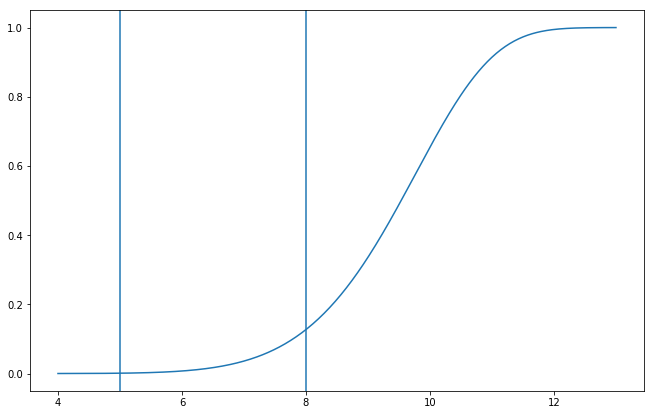

In [12]:
params = st.weibull_min.fit(df)

x = np.linspace(4, 13, 500)

cdf = weibull_min.cdf(x, *params)
# pairs = list(zip(x, cdf))
# for idx, pair in enumerate(pairs):
#     if round(pair[0],3) == 8:
#         print('The probability of failure between years 5 and 8 is ', pair[1])
        
p5_8 = weibull_min.cdf(8, *params) - weibull_min.cdf(5, *params)
print('The probability of failure between years 5 and 8 is ', p5_8)


plt.axvline(x=5)
plt.axvline(x=8)
plt.plot(x, cdf);

#### 3.2 Probability of failure before year 8

In [13]:
p8 = weibull_min.cdf(8, *params)
print('The probability of failure before year 8 is ', p8)

The probability of failure before year 8 is  0.1270905936895931


## Problem 4

$$ P_{1} = P_{1,1} + P_{1,2} = 0.13 + 0.08 = 0.21 $$
<br>
$$ P_{2} = P_{2,1} + P_{2,2} = 0.17 + 0.127 = 0.297 $$
<br>
$$ P = P(overpressuring reactor) = P_{1} * P_{2} = 0.21 * 0.297 = 0.06237 $$
<br> The unmitigated risk of overpressuring the reactor is unacceptable. _See Excel sheet 'FMEA Tables' for completed unmitigated risk matrix_

## Problem 5 - Solved in Excel (see 'Mitigating Actions' sheet)

## Problem 6 - Optimization Program 1 - Minimum Aceptance Probability
<br>
$$\begin{array}{lll}
\text{minimize}   & \sum_{i=1}^{4} c_{i}x_{i} \\
\text{subject to} & P_{1} * P_{2} \leq 0.03 \\
                  & P_{1} = P_{1,1}(1-\beta_{1}x_{1}) + P_{1,2}(1-\beta_{2}x_{2}) \\
                  & P_{2} = P_{2,1}(1-\beta_{3}x_{3}) + P_{2,2}(1-\beta_{4}x_{4}) \\
                  & x_{i} \in \{0,1\} \\
                  & c_{1} = 80000, c_{2} = 10000, c_{3} = 20000, c_{4} = 70000 \\
                  & \beta_{1} = 0.15, \beta_{2} = 0.5, \beta_{3} = 0.09, \beta_{4} = 0.20
\end{array}$$

## Problem 7 - Optimization Program 2 - Budget Constraint
<br>
$$\begin{array}{lll}
\text{minimize}   & P_{1} * P_{2} \\
\text{subject to} & \sum_{i=1}^{4} c_{i}x_{i} \leq B \\
                  & P_{1} = P_{1,1}(1-\beta_{1}x_{1}) + P_{1,2}(1-\beta_{2}x_{2}) \\
                  & P_{2} = P_{2,1}(1-\beta_{3}x_{3}) + P_{2,2}(1-\beta_{4}x_{4}) \\
                  & x_{i} \in \{0,1\} \\
                  & B = 90000, c_{1} = 80000, c_{2} = 10000, c_{3} = 20000, c_{4} = 70000 \\
                  & \beta_{1} = 0.15, \beta_{2} = 0.5, \beta_{3} = 0.09, \beta_{4} = 0.20
\end{array}$$

## Problem 8 - Gurobi Optimization

In [14]:
from gurobipy import *

cost = [80000, 10000, 20000, 70000]

m = Model("solenoid")

#decision variables - mitigating actions
x1 = m.addVar(vtype=GRB.BINARY, name="x1")
x2 = m.addVar(vtype=GRB.BINARY, name="x2")
x3 = m.addVar(vtype=GRB.BINARY, name="x3")
x4 = m.addVar(vtype=GRB.BINARY, name="x4")
m.update()

P1 = m.addVar(name='P1')
P2 = m.addVar(name='P2')
m.update()

#define constants
P11 = 0.13
P12 = 0.08
P21 = 0.17
P22 = 0.127

#add constraints
m.addConstr(P1 * P2 <= 0.03, "c0")
m.addConstr(P11*(1-0.15*x1) + P12*(1-0.5*x2) == P1, "c1")
m.addConstr(P21*(1-0.09*x3) + P22*(1-0.20*x4) == P2, "c2")
m.update()

objective = x1*cost[0]+x2*cost[1]+x3*cost[2]+x4*cost[3]
m.setObjective(objective, GRB.MINIMIZE)
m.update()

m.optimize()

Academic license - for non-commercial use only
Optimize a model with 2 rows, 6 columns and 6 nonzeros
Model has 1 quadratic constraint
Variable types: 2 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+04, 8e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 3e-01]
  QRHS range       [3e-02, 3e-02]
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.03 seconds
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


The above optimization problem is infeasible. It can be seen from the Excel sheet 'Mitigating Actions' that if all of the stragey variable are set to 1 (that is, all mitigating actions are taken with no regard to cost), then __the minimum probability of overpressuring the reactor that cna be achieved is 3.85%, which is above the minimum acceptance probability criteria of 3% set by the FMEA tables.__ In order for this problem to be feasible, the beta values for the mitigating actions would have to be changed to reduce the probability by a greater magnitude, additional mitigating actions would have to be introduced to the problem, or the minimum acceptance probability criteria would have to be increased to about 4%.